In [40]:
import yfinance as yf

In [41]:
ticker = 'TCS'

In [42]:
start = '2020-01-01'
end = '2024-03-31'

In [43]:
df = yf.download(ticker, start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [44]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,4.29,4.37,4.17,4.27,3.991522,142800
2020-01-03,4.22,4.32,4.18,4.28,4.000870,141500
2020-01-06,4.23,4.46,4.20,4.45,4.159782,118500
2020-01-07,4.44,4.45,4.31,4.39,4.103695,104500
2020-01-08,4.36,4.45,4.33,4.34,4.056957,213400


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [46]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [47]:
df_corr = df.corr()

<Axes: >

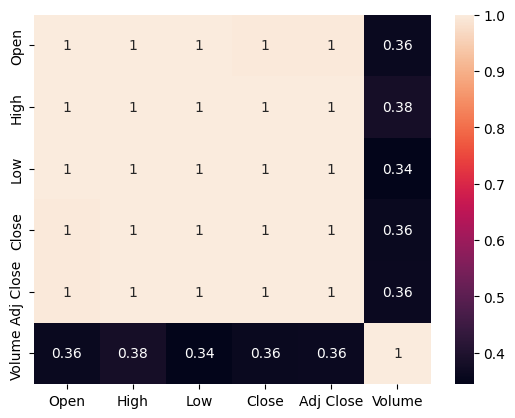

In [48]:
sns.heatmap(df_corr,annot= True)

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [50]:
df_scale = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [51]:
df_scale

array([[0.17931793],
       [0.17986799],
       [0.18921891],
       ...,
       [0.00385039],
       [0.0049505 ],
       [0.00715071]])

In [62]:
import numpy as np
def create_dataset(df, time_steps):
    x, y = [], []
    for i in range(len(df) - time_steps - 1):
        x.append(df[i:(i + time_steps), 0])
        y.append(df[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
x, y = create_dataset(df_scale, time_steps)

In [63]:
train = int(len(x) * 0.8)

In [64]:
train

844

In [66]:
x_tr, x_te = x[:train], x[train:]

In [67]:
y_tr, y_te = y[:train], y[train:]

In [68]:
x_tr = x_tr.reshape(x_tr.shape[0], x_tr.shape[1])

In [70]:
x_te = x_te.reshape(x_te.shape[0], x_te.shape[1])

In [71]:
model = Sequential([
    LSTM(128, input_shape=(time_steps,1), return_sequences= True),
    LSTM(64, return_sequences=False),
    Dense(10)
])

In [72]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [73]:
model.fit(x_tr, y_tr, epochs= 100, batch_size= 32)

Epoch 1/100
27/27 [==============================] - 4s 12ms/step - loss: 0.0529
Epoch 2/100
27/27 [==============================] - 0s 12ms/step - loss: 0.0025
Epoch 3/100
27/27 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 4/100
27/27 [==============================] - 0s 12ms/step - loss: 0.0016
Epoch 5/100
27/27 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 6/100
27/27 [==============================] - 0s 13ms/step - loss: 0.0015
Epoch 7/100
27/27 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 8/100
27/27 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 9/100
27/27 [==============================] - 0s 15ms/step - loss: 0.0014
Epoch 10/100
27/27 [==============================] - 0s 12ms/step - loss: 0.0015
Epoch 11/100
27/27 [==============================] - 0s 14ms/step - loss: 0.0014
Epoch 12/100
27/27 [==============================] - 0s 12ms/step - loss: 0.0014
Epoch 13/100
27/27 [=====

In [74]:
mse = model.evaluate(x_te, y_te)
print(mse)

7/7 [==============================] - 1s 5ms/step - loss: 6.4112e-05
6.411178765119985e-05


In [75]:
predict = model.predict(x_te)

7/7 [==============================] - 1s 5ms/step


In [76]:
predict = scaler.inverse_transform(predict)

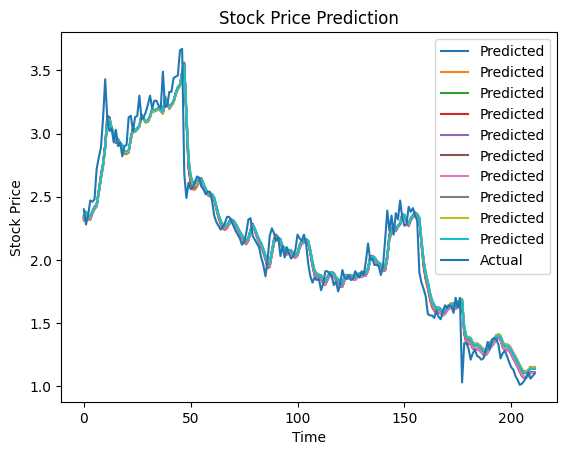

In [77]:
# Visualize the predictions
import matplotlib.pyplot as plt

plt.plot(predict, label='Predicted')
plt.plot(scaler.inverse_transform(y_te.reshape(-1, 1)), label='Actual')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()